In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();


Bad key "text.kerning_factor" on line 4 in
/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.DataFrame({
    'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]
})

In [3]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


In [4]:
df.Coordinates = df.Coordinates.apply(Point)

In [5]:
df.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [6]:
gdf = gpd.GeoDataFrame(df, geometry = 'Coordinates')

In [7]:
gdf.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [9]:
world = world.set_index('iso_a3')

In [10]:
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
world.geometry.name

'geometry'

In [12]:
world.loc['AFG', 'geometry']

IllegalArgumentException: Argument must be Polygonal or LinearRing


PredicateError: Failed to evaluate <_FuncPtr object at 0x11fa417a0>

In [13]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

In [14]:
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


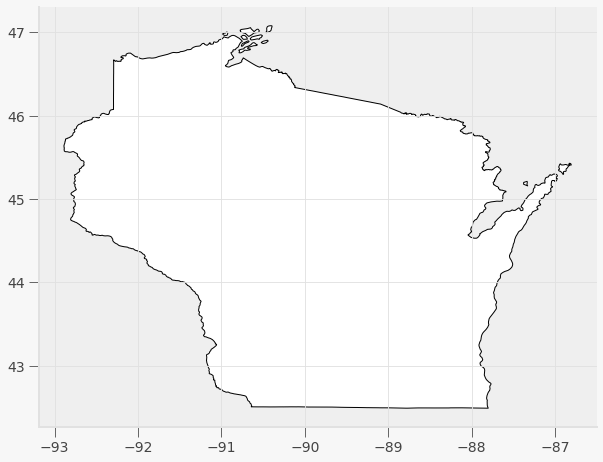

In [19]:
fig, gax = plt.subplots(figsize = (10,10))
state_df.query("NAME == 'Wisconsin'").plot(ax = gax, edgecolor = 'black', color='white')
plt.show()

In [20]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")

In [21]:
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


In [22]:
county_df = county_df.query("STATEFP == '55'")

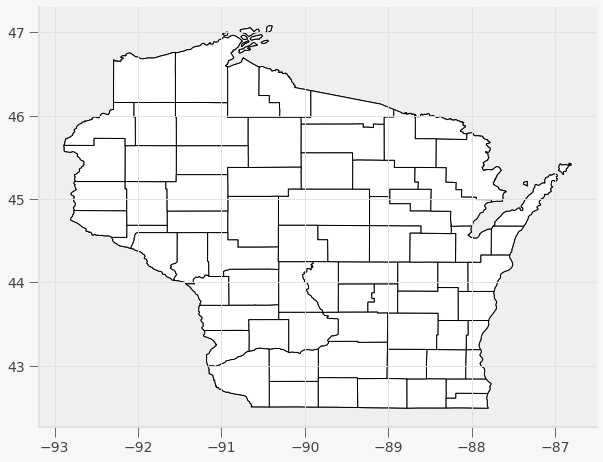

In [25]:
fig, gax = plt.subplots(figsize=(10,10))
state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor = 'black', color = 'white')
county_df.plot(ax = gax, edgecolor = 'black', color = 'white')

In [28]:
results = pd.read_csv("https://datascience.quantecon.org/assets/data/ruhl_cleaned_results.csv", thousands=",")

In [29]:
results

,county,total,trump,clinton
0,ADAMS,10130,5966,3745
1,ASHLAND,8032,3303,4226
2,BARRON,22671,13614,7889
3,BAYFIELD,9612,4124,4953
4,BROWN,129011,67210,53382
...,...,...,...,...
67,WAUKESHA,237593,142543,79224
68,WAUPACA,26095,16209,8451
69,WAUSHARA,12074,7667,3791
70,WINNEBAGO,87135,43445,37047


In [39]:
results["county"] = results["county"].str.title()
results["county"] = results["county"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

In [40]:
results

,county,total,trump,clinton
0,Adams,10130,5966,3745
1,Ashland,8032,3303,4226
2,Barron,22671,13614,7889
3,Bayfield,9612,4124,4953
4,Brown,129011,67210,53382
...,...,...,...,...
67,Waukesha,237593,142543,79224
68,Waupaca,26095,16209,8451
69,Waushara,12074,7667,3791
70,Winnebago,87135,43445,37047


In [38]:
county_df

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
27,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857..."
28,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157..."
67,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843..."
76,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681..."
114,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678..."
...,...,...,...,...,...,...,...,...,...,...
2853,55,017,01581068,0500000US55017,55017,Chippewa,06,2611619746,85230103,"POLYGON ((-91.66565 45.20799, -91.54223 45.206..."
2930,55,013,01581066,0500000US55013,55013,Burnett,06,2127856271,151932123,"POLYGON ((-92.88571 45.64602, -92.88399 45.654..."
2980,55,111,01581115,0500000US55111,55111,Sauk,06,2153654529,45723565,"POLYGON ((-90.31240 43.64099, -89.78581 43.641..."
3040,55,083,01581102,0500000US55083,55083,Oconto,06,2582755384,392746967,"POLYGON ((-88.67800 45.37868, -88.42810 45.377..."


In [41]:
res_w_states = county_df.merge(results, left_on="NAME", right_on="county", how="inner")

In [42]:
res_w_states

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,55025,23331,27340
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,9137,5185,3503
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,94302,46681,42641
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,38589,17305,18529
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,26095,16209,8451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,55,017,01581068,0500000US55017,55017,Chippewa,06,2611619746,85230103,"POLYGON ((-91.66565 45.20799, -91.54223 45.206...",Chippewa,31568,17916,11887
68,55,013,01581066,0500000US55013,55013,Burnett,06,2127856271,151932123,"POLYGON ((-92.88571 45.64602, -92.88399 45.654...",Burnett,8738,5410,2949
69,55,111,01581115,0500000US55111,55111,Sauk,06,2153654529,45723565,"POLYGON ((-90.31240 43.64099, -89.78581 43.641...",Sauk,31357,14799,14690
70,55,083,01581102,0500000US55083,55083,Oconto,06,2582755384,392746967,"POLYGON ((-88.67800 45.37868, -88.42810 45.377...",Oconto,20206,13345,5940


In [43]:
res_w_states["trump_share"] = res_w_states["trump"] / (res_w_states["total"])
res_w_states["rel_trump_share"] = res_w_states["trump"] / (res_w_states["trump"]+res_w_states["clinton"])
res_w_states.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton,trump_share,rel_trump_share
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,55025,23331,27340,0.424007,0.460441
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,9137,5185,3503,0.567473,0.596800
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,94302,46681,42641,0.495016,0.522615
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,38589,17305,18529,0.448444,0.482921
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,26095,16209,8451,0.621153,0.657299


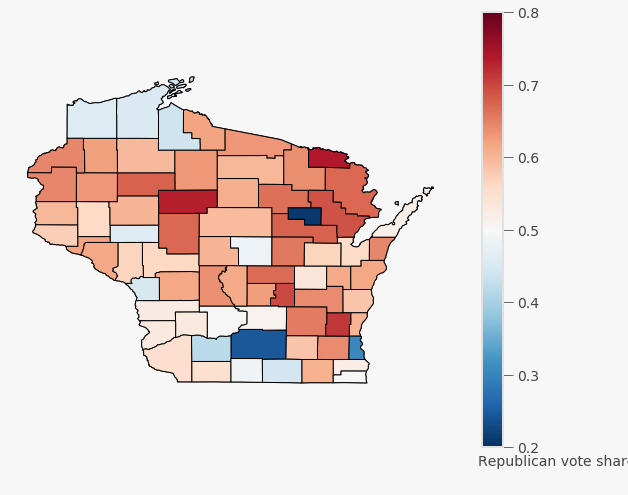

In [44]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
state_df[state_df['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

# Plot the counties and pass 'rel_trump_share' as the data to color
res_w_states.plot(
    ax=gax, edgecolor='black', column='rel_trump_share', legend=True, cmap='RdBu_r',
    vmin=0.2, vmax=0.8
)

# Add text to let people know what we are plotting
gax.annotate('Republican vote share',xy=(0.76, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('off')

plt.show()